In [12]:
import pandas
import data

df_covid19_stats = pandas.read_csv(data.data_dir+data.hopkins_data_filename, index_col=[0], header=[0,1])

print("Available data:")
print(df_covid19_stats.columns.values)
print(df_covid19_stats.index.values)

Available data:
[('Afghanistan', 'Deceased') ('Afghanistan', 'Infected (confirmed)')
 ('Afghanistan', 'Recovered') ('Albania', 'Deceased')
 ('Albania', 'Infected (confirmed)') ('Albania', 'Recovered')
 ('Algeria', 'Deceased') ('Algeria', 'Infected (confirmed)')
 ('Algeria', 'Recovered') ('Andorra', 'Deceased')
 ('Andorra', 'Infected (confirmed)') ('Andorra', 'Recovered')
 ('Antigua and Barbuda', 'Deceased')
 ('Antigua and Barbuda', 'Infected (confirmed)')
 ('Antigua and Barbuda', 'Recovered') ('Argentina', 'Deceased')
 ('Argentina', 'Infected (confirmed)') ('Argentina', 'Recovered')
 ('Armenia', 'Deceased') ('Armenia', 'Infected (confirmed)')
 ('Armenia', 'Recovered') ('Australia', 'Deceased')
 ('Australia', 'Infected (confirmed)') ('Australia', 'Recovered')
 ('Austria', 'Deceased') ('Austria', 'Infected (confirmed)')
 ('Austria', 'Recovered') ('Azerbaijan', 'Deceased')
 ('Azerbaijan', 'Infected (confirmed)') ('Azerbaijan', 'Recovered')
 ('Bahamas, The', 'Deceased') ('Bahamas, The', 'I

## Drop all unnecessary data

In [13]:
covid19_countries = df_covid19_stats.columns.get_level_values(0).values

# get available countries close to austria
austria_most_connected_available = list(set(data.most_connected_austria) & set(covid19_countries))

# get available countries eu + interesting
eu_plus_available = list(set(data.all_countries_eu_plus) & set(covid19_countries))

## Create output directory

In [14]:
import os

directory = "{}{}/".format(data.export_dir, 'population_stats')
if not os.path.exists(directory):
    os.makedirs(directory)

## Create and save covid-19 only statistics

In [19]:
#selected_countries = eu_plus_available
selected_countries = austria_most_connected_available

selected_countries_slice = pandas.IndexSlice[:, selected_countries]
print(selected_countries_slice)

(slice(None, None, None), ['Turkey', 'Netherlands', 'Slovakia', 'Serbia', 'Croatia', 'Switzerland', 'Liechtenstein', 'Romania', 'Hungary', 'Austria', 'Germany', 'Spain', 'Bosnia and Herzegovina', 'Slovenia', 'Italy', 'Greece'])


### Population Density

In [20]:
import lib.csse_covid_19_dataset.data_processing as data_processing

df = df_covid19_stats.loc[:, selected_countries_slice]

print(df)

infected_column_name = 'Infected (confirmed)'
recovered_column_name = 'Recovered'
deceased_column_name = 'Deceased'
infected_column_slice = pandas.IndexSlice[data.at, infected_column_name]
recovered_column_slice = pandas.IndexSlice[data.at, recovered_column_name]
deceased_column_slice = pandas.IndexSlice[data.at, deceased_column_name]

infected_recovered_deceased_column_name = infected_column_name+" - "+recovered_column_name+" - "+deceased_column_name
infected_recovered_deceased_column_slice = pandas.IndexSlice[data.at, infected_recovered_deceased_column_name]
infected_recovered_deceased_change_column_name = "\u0394 ({})".format(infected_recovered_deceased_column_name)
infected_recovered_deceased_change_column_slice = pandas.IndexSlice[data.at, infected_recovered_deceased_change_column_name]
infected_recovered_deceased_growth_factor_column_name = "\u0394 ({})i / \u0394 ({})i-1".format(infected_recovered_deceased_column_name, infected_recovered_deceased_column_name)
infected_recovered_deceased_growth_factor_column_slice = pandas.IndexSlice[data.at, infected_recovered_deceased_growth_factor_column_name]

df_at = data_processing.selectCountries(df_covid19_stats, [data.at])
df_at.loc[:, infected_recovered_deceased_column_slice] = df_at.loc[:, infected_column_slice] - df_at.loc[:, recovered_column_slice] - df_at.loc[:, deceased_column_slice]
df_at.loc[:, infected_recovered_deceased_change_column_slice] = df_at.loc[:, infected_recovered_deceased_column_slice].diff()

for i in range(1, len(df_at)):
    if i < 1:
        df_at.loc[idx, infected_recovered_deceased_growth_factor_column_slice] = nan
    else:
        idx = df_at.index[i]
        prev_idx = df_at.index[i-1]
        df_at.loc[idx, infected_recovered_deceased_growth_factor_column_slice] = df_at.loc[idx, infected_recovered_deceased_change_column_slice] / df_at.loc[prev_idx, infected_recovered_deceased_change_column_slice]

#print(df_at)
df_at_neighbours = data_processing.selectCountries(df_covid19_stats, data.at_neighbours)
df_at_nationalities = data_processing.selectCountries(df_covid19_stats, data.at_nationalities)
df_at_travel_incomming = data_processing.selectCountries(df_covid19_stats, data.at_travel_incomming)
df_at_travel_outgoing = data_processing.selectCountries(df_covid19_stats, data.at_travel_outgoing)
#print(df_at)

Empty DataFrame
Columns: []
Index: [2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27, 2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31, 2020-02-01, 2020-02-02, 2020-02-03, 2020-02-04, 2020-02-05, 2020-02-06, 2020-02-07, 2020-02-08, 2020-02-09, 2020-02-10, 2020-02-11, 2020-02-12, 2020-02-13, 2020-02-14, 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 2020-02-19, 2020-02-20, 2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24, 2020-02-25, 2020-02-26, 2020-02-27, 2020-02-28, 2020-02-29, 2020-03-01, 2020-03-02, 2020-03-03, 2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, 2020-03-08, 2020-03-09, 2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13, 2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18, 2020-03-19]


/home/mario/.local/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mario/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: di

In [12]:
def prev_times_x(prev_value, n, x):
    if not isinstance(prev_value, list):
        prev_value = [prev_value]
    if n == 0: return []
    if n == 1: return prev_value
    elif n == 2: return prev_value+[prev_value[-1] * x]
    else: return prev_times_x(prev_value+[prev_value[-1] * x], n - 1, x)
    
def prev_times1_4(prev_value, n):
    return prev_times_x(prev_value, n, 1.4)

def prev_times1_38(prev_value, n):
    return prev_times_x(prev_value, n, 1.38)


In [13]:
future_days = 30

infected_recovered_deceased_column = [data.at, infected_recovered_deceased_column_name]
infected_recovered_deceased_prediction_1_4_column_name = infected_recovered_deceased_column_name +' Prediction F1.4'
infected_recovered_deceased_prediction_1_38_column_name = infected_recovered_deceased_column_name +' Prediction F1.38'

    
#print(prev_times1_4(1,2))
#print(prev_times1_4(1,5))
#print(prev_times1_4(2,5))
# print(df_prep.loc[:, pandas.IndexSlice[:, :, [column_infected]]])

# approcimation to linear exponential function
df_at_pred = data_processing.assignPredictionFromFirstInfectionUntilFuture(df_at, infected_recovered_deceased_column, infected_recovered_deceased_prediction_1_4_column_name, future_days, prev_times1_4)
df_at_pred = data_processing.assignPredictionFromFirstInfectionUntilFuture(df_at_pred, infected_recovered_deceased_column, infected_recovered_deceased_prediction_1_38_column_name, 0, prev_times1_38)

In [14]:
# approximation to logistic function
import numpy

#idx = df_at_pred.index

#df_at_pred.reset_index(inplace=True, drop=True)
#print(df_at_pred.index)
#print(df_at_pred.columns)
#print(df_at_pred)

from scipy import optimize
def logistic_func(x, a, b, c):
    #return c / (1 + a * pow(b, x))
    #print(x, a, b)
    return c / (1 + numpy.exp((a - x) / b))

#print(df_at_pred.loc[:, infected_column_slice].values)
#print(df_at_pred.index.values)
#params, params_covariance = optimize.curve_fit(logistic_func, df_at_pred.index.values, df_at_pred.loc[:, pandas.IndexSlice[data.at, infected_recovered_deceased_prediction_column_name]].values, p0=[35, 1.1, 5])
#params, params_covariance = optimize.curve_fit(logistic_func, df_at_pred.index.values, df_at_pred.loc[:, infected_column_slice].values, p0=[35, 2])
#print("fitting_params:\n\ta={}\n\tb={}\n\ta={}".format(*params))
#print(params)
#print(params_covariance)


#infected_prediction_logistic_curve_column_name = "{} Prediction (fitted logistic curve)".format(infected_column_name)
#infected_prediction_logistic_curve_column_slice = pandas.IndexSlice[data.at, infected_prediction_logistic_curve_column_name]

#df_at_pred.loc[:, infected_prediction_logistic_curve_column_slice] = [logistic_func(x, *params) for x in df_at_pred.index.values]

#df_at_pred.index = idx
#print(df_at_pred.loc[:, infected_prediction_logistic_curve_column_slice])

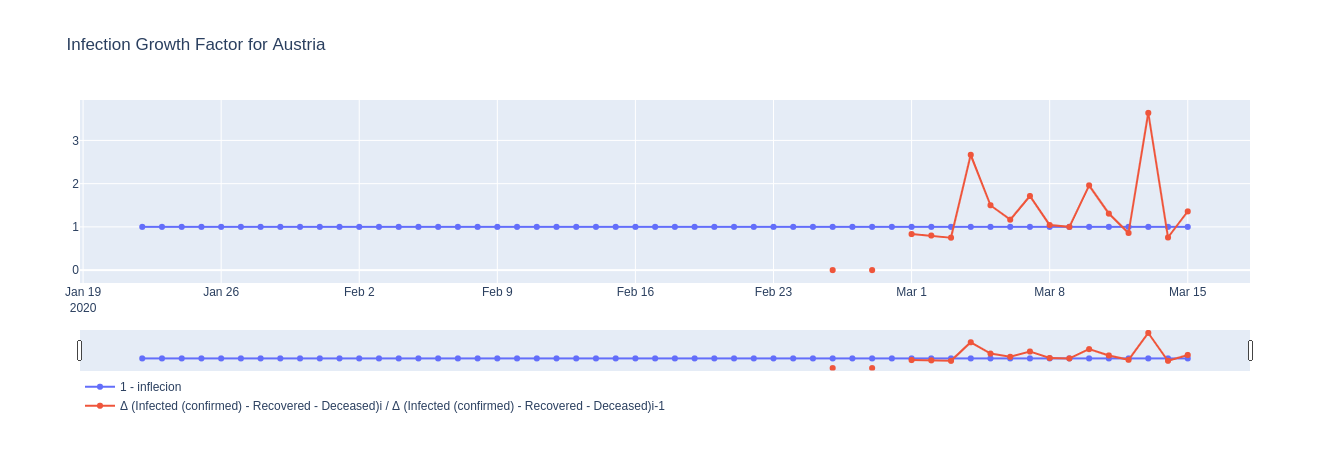

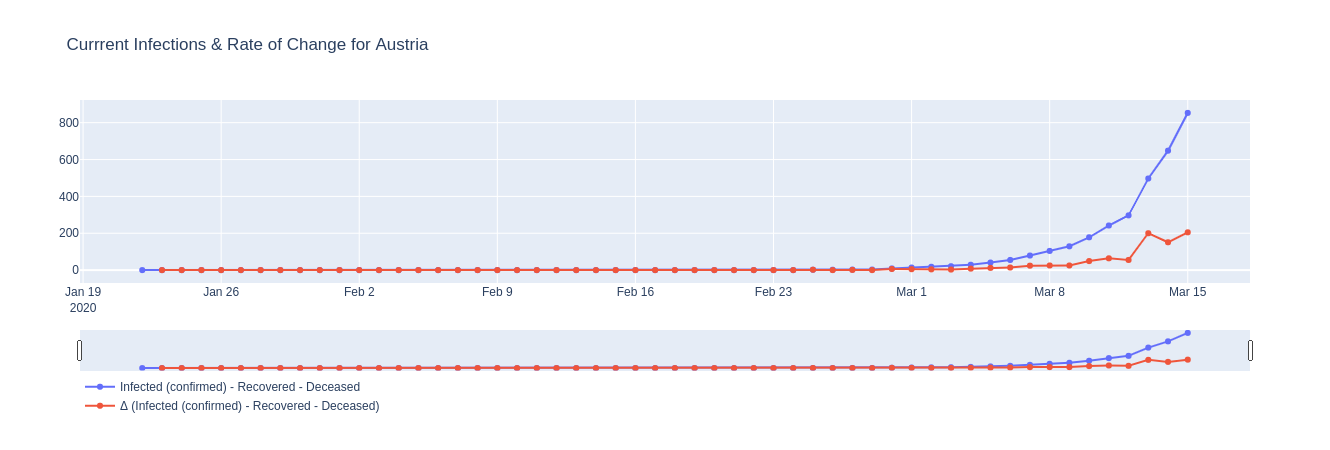

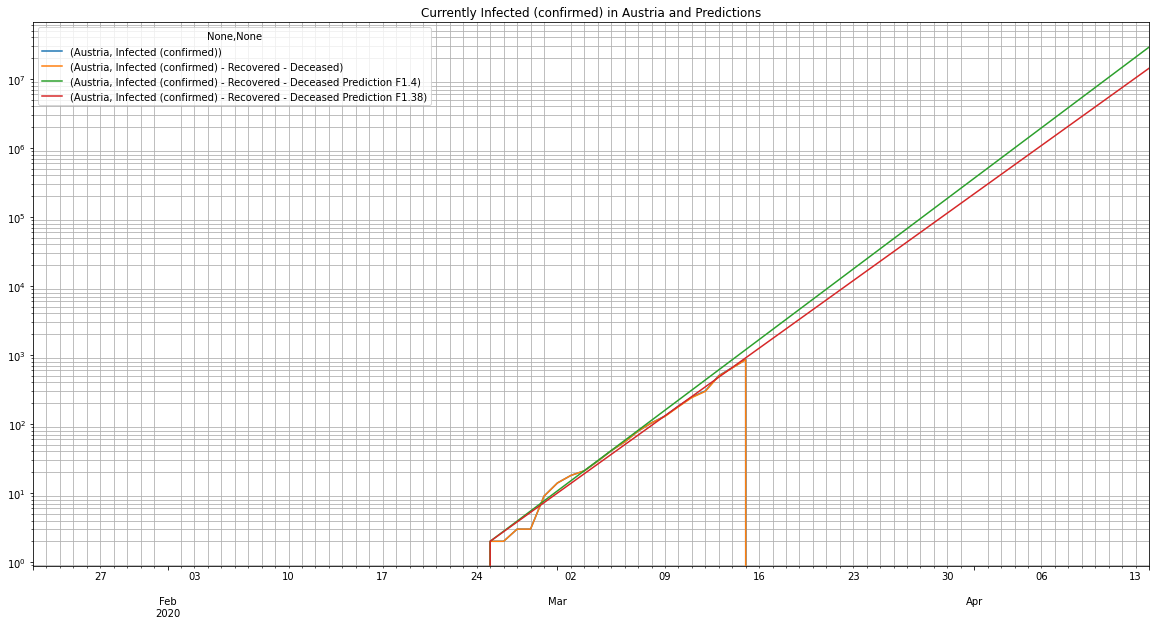

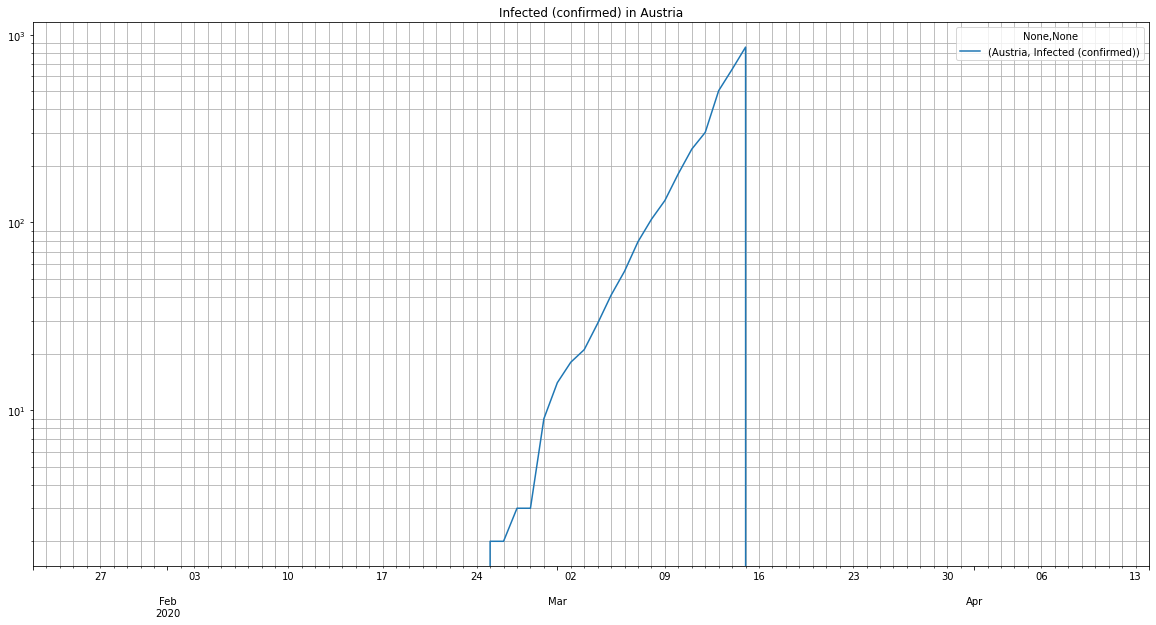

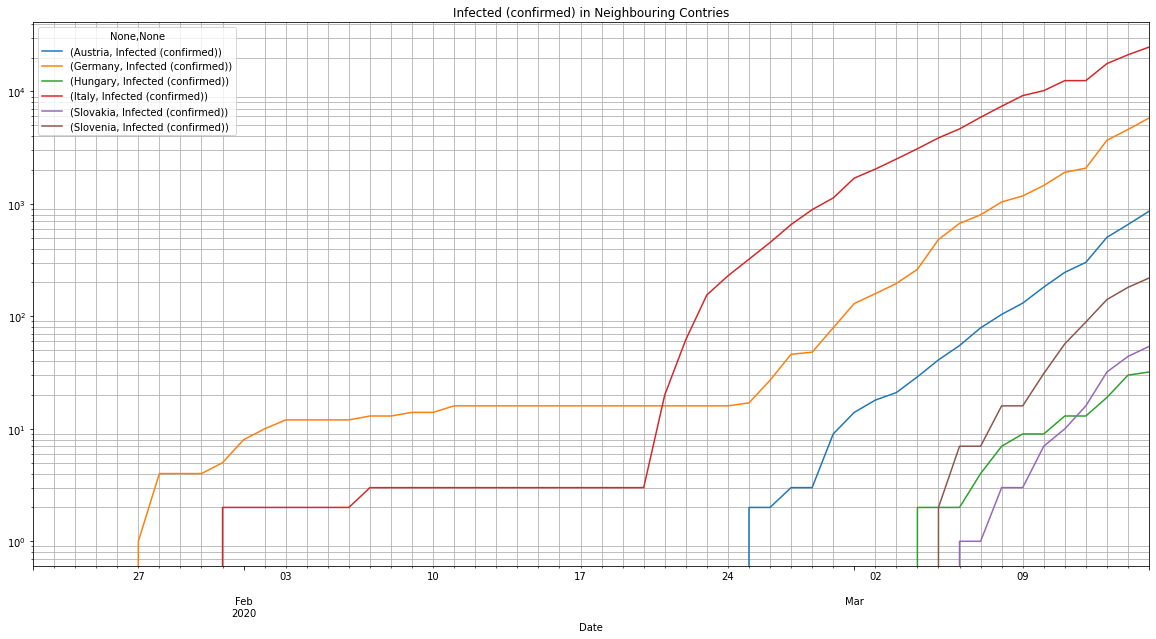

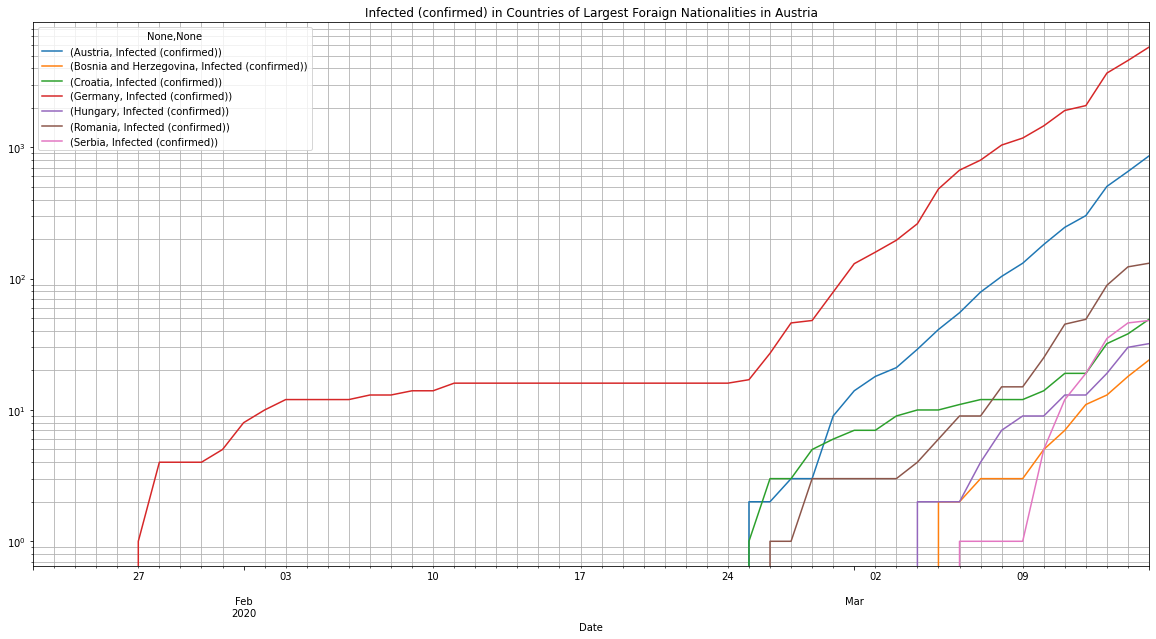

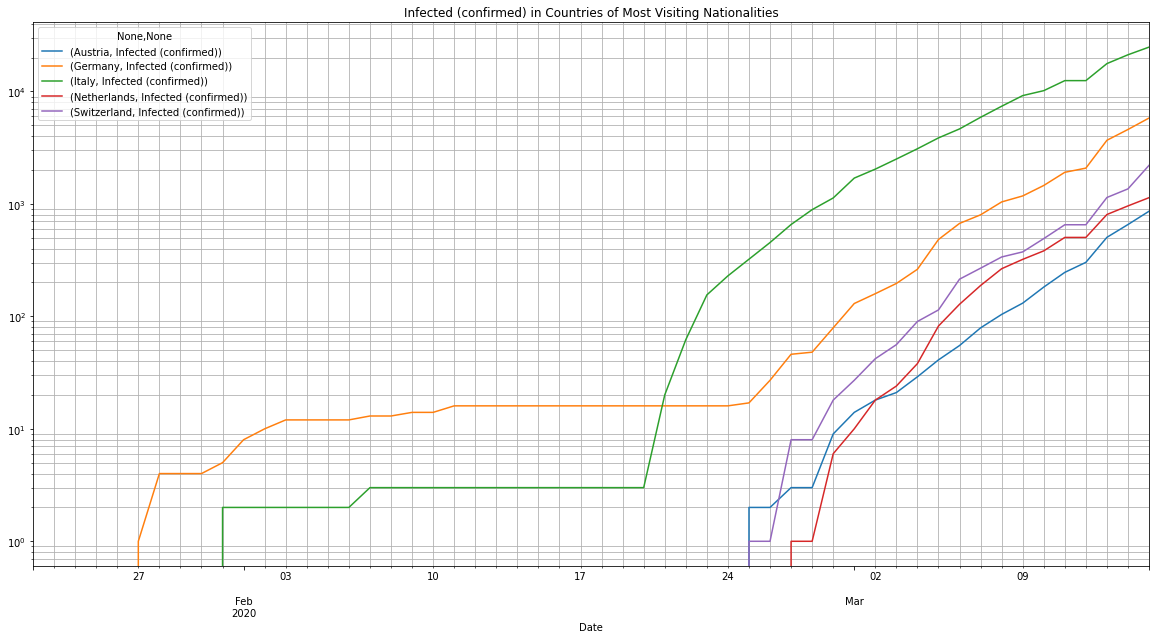

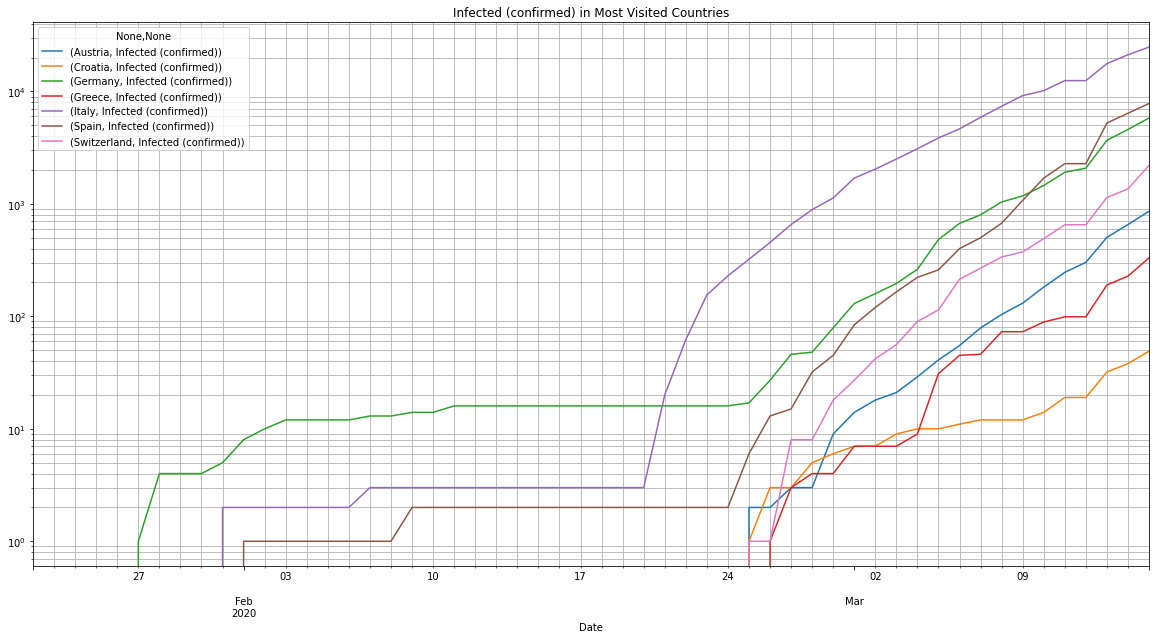

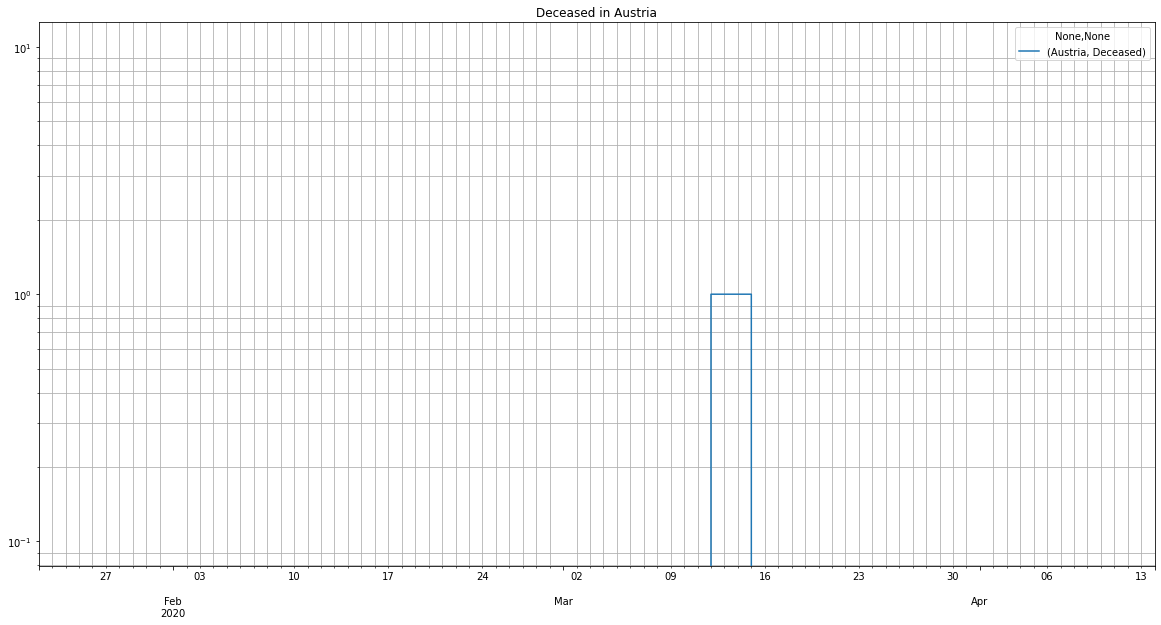

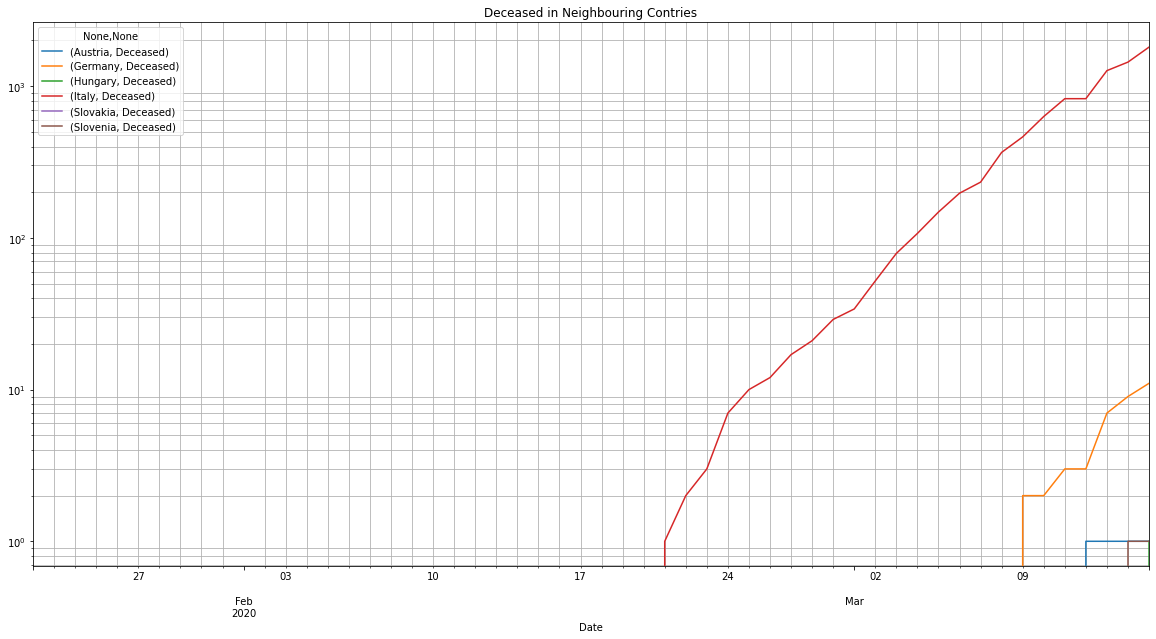

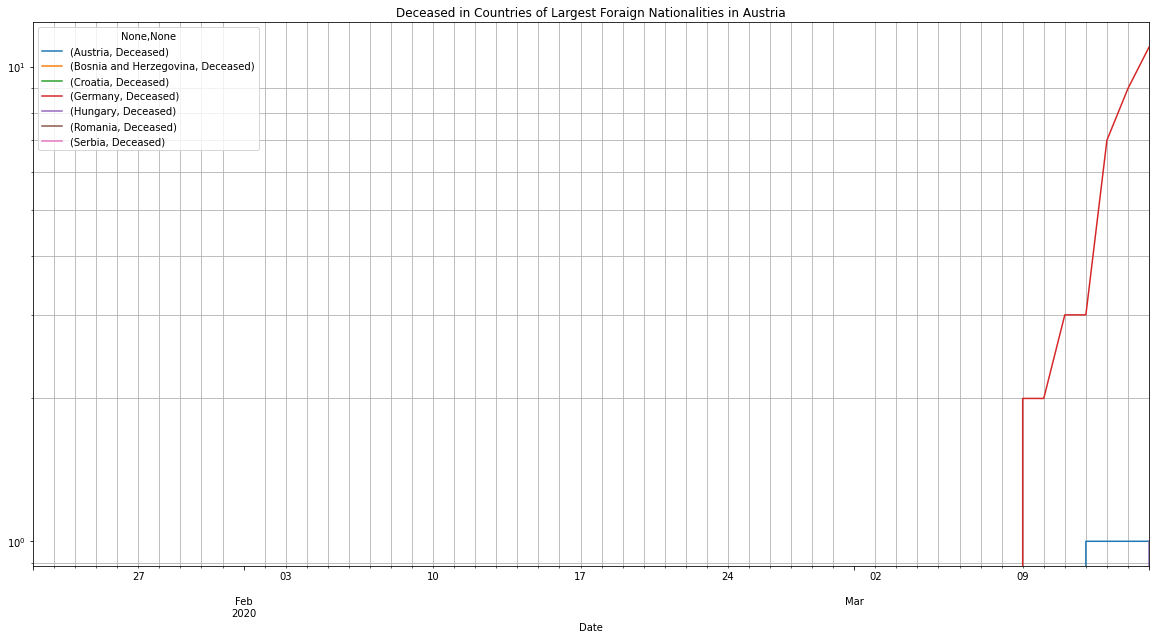

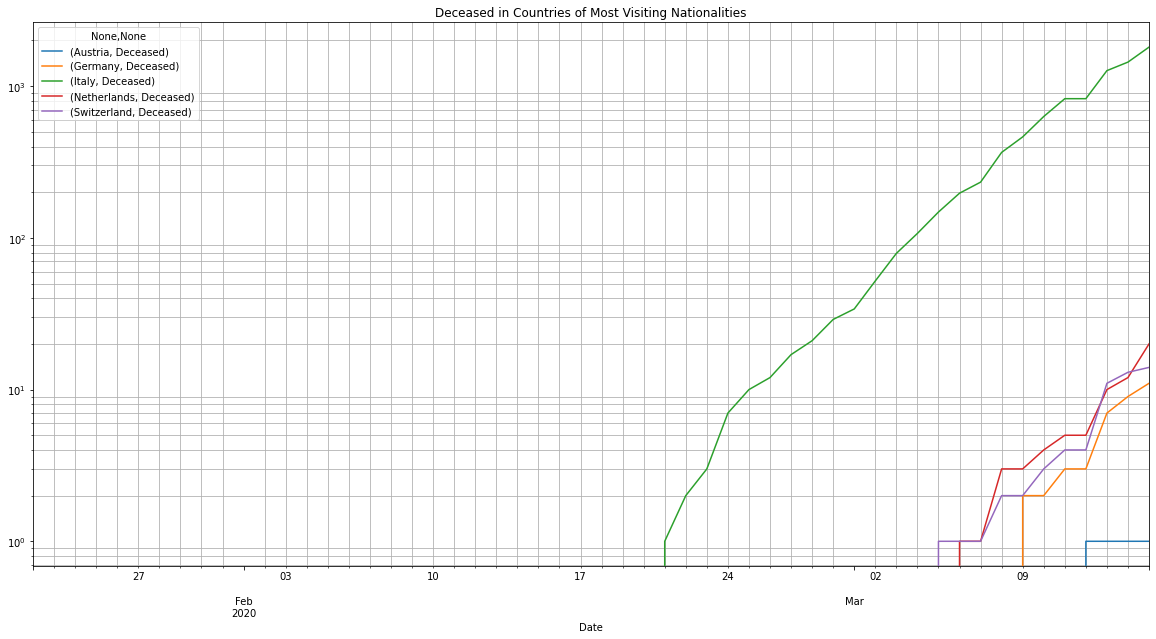

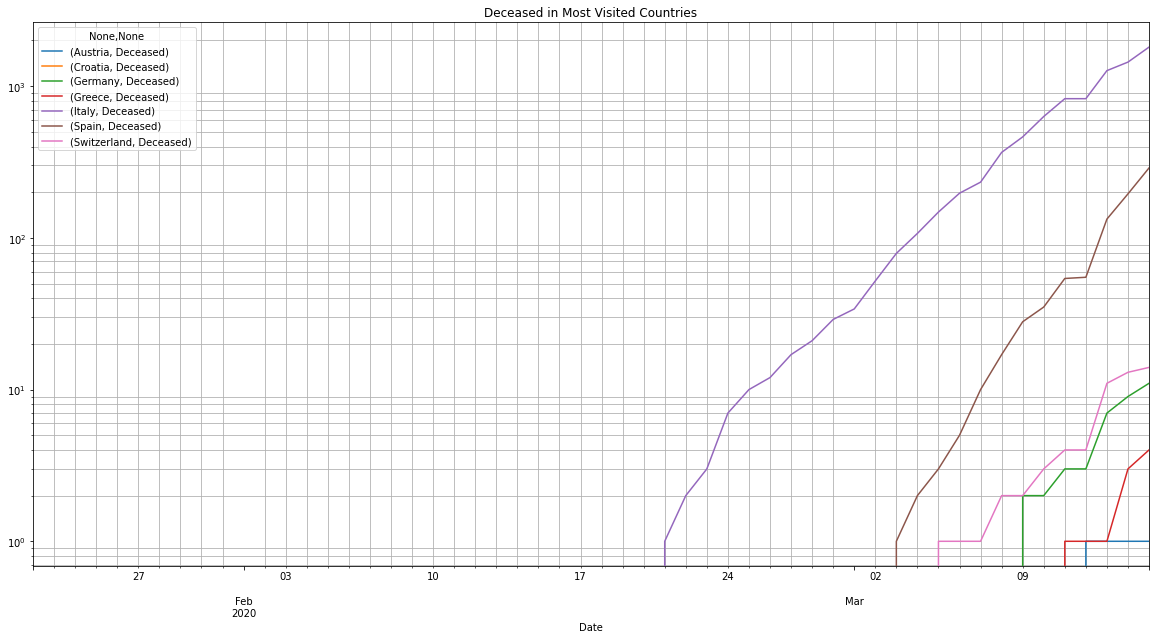

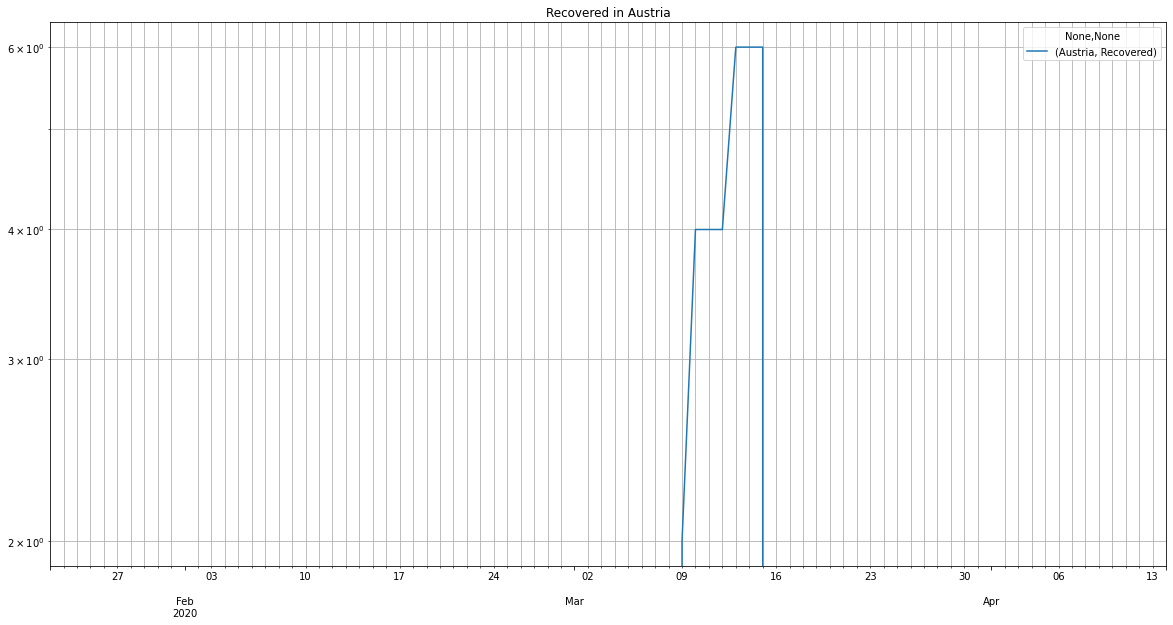

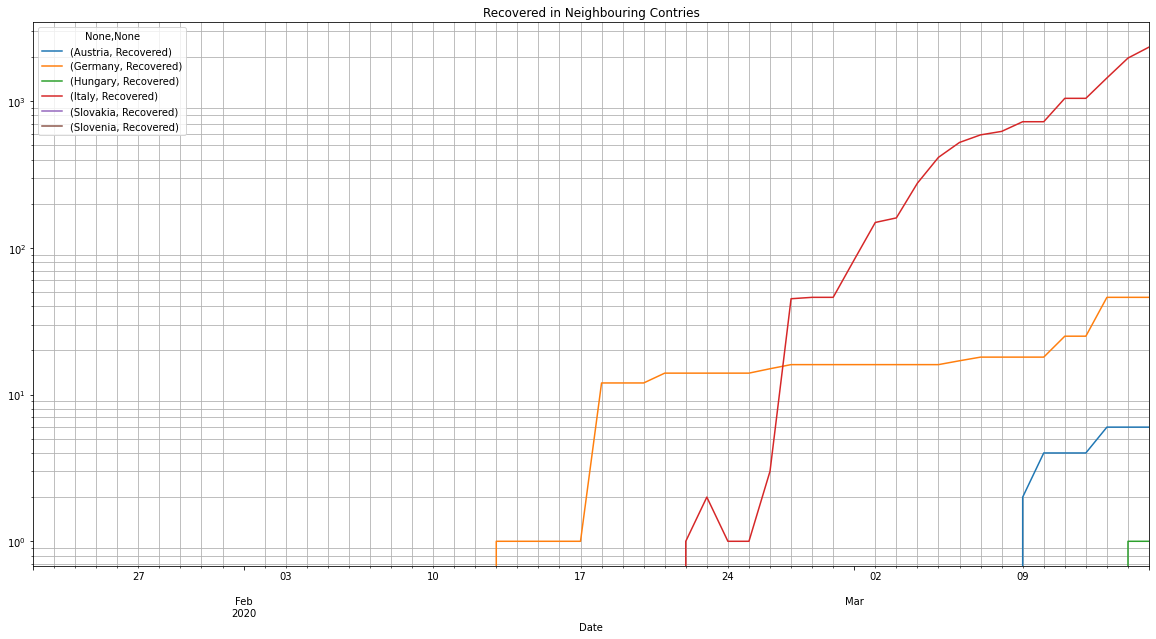

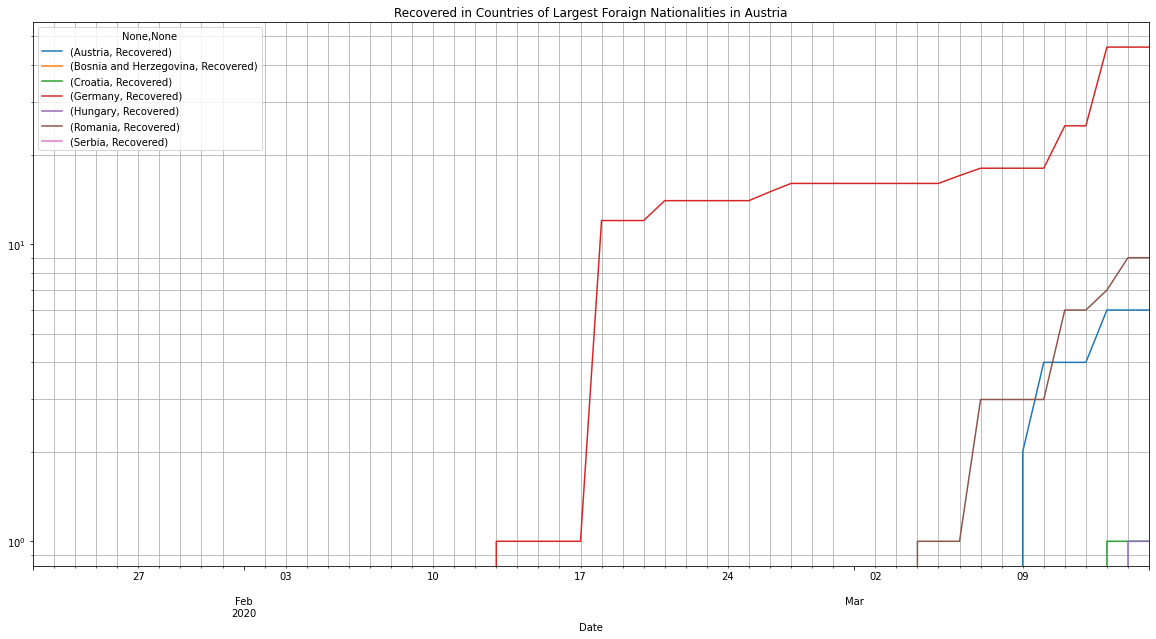

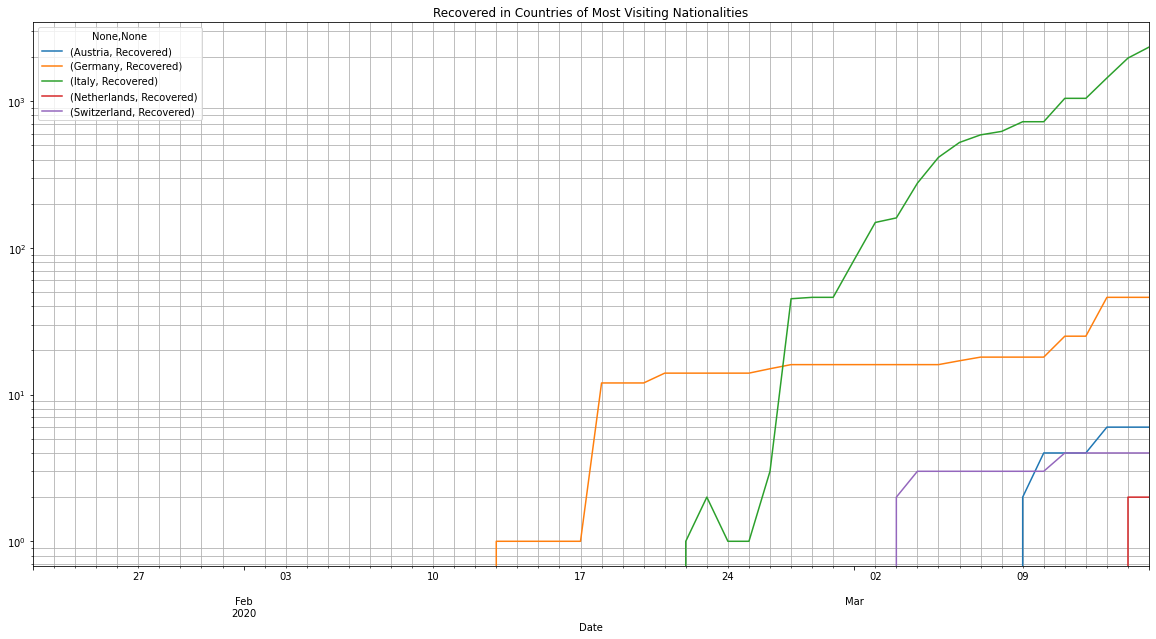

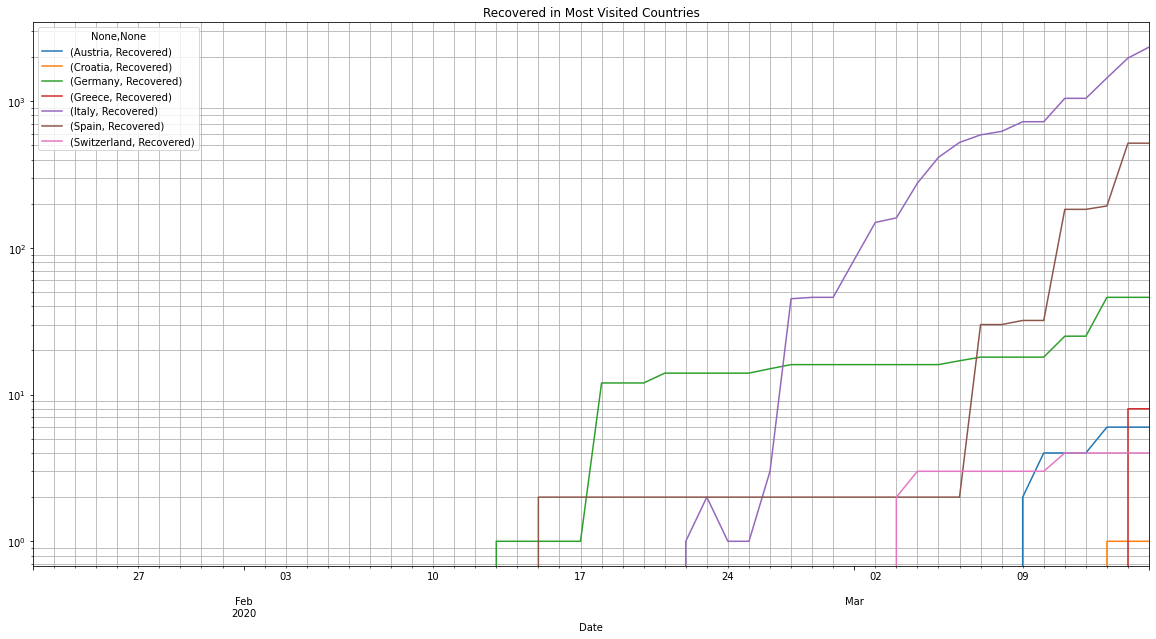

In [15]:
import lib.csse_covid_19_dataset.io as io
import os
import plotly.graph_objects as go

latest_data_date = df_prep.index[-1].strftime("%Y-%m-%d")
    
directory = "export/{}/".format(latest_data_date)
if not os.path.exists(directory):
    os.makedirs(directory)


# Growth factor
title = "Infection Growth Factor for {}".format(data.at)
df_at.loc[:, pandas.IndexSlice[data.at, '1 - inflecion']] = 1

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_at.index, 
                         y=df_at[(data.at, '1 - inflecion')], 
                         name='1 - inflecion',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=df_at.index, 
                         y=df_at[(data.at, infected_recovered_deceased_growth_factor_column_name)], 
                         name=infected_recovered_deceased_growth_factor_column_name,
                         mode='lines+markers'))
fig.update_layout(title_text=title,
                  xaxis_rangeslider_visible=True,
                  legend=dict(x=0, y=-0.75))
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_at[[(data.at, '1 - inflecion'), (data.at, infected_recovered_deceased_growth_factor_column_name)]],
               directory, title)
#io.saveDataCsv(df_at.loc[:, pandas.IndexSlice[data.at, ['1 - inflecion', infected_recovered_deceased_growth_factor_column_name]]],
#               directory, title)


# Current infections and change rate
title = "Currrent Infections & Rate of Change for {}".format(data.at)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_at.index, 
                         y=df_at[(data.at, infected_recovered_deceased_column_name)], 
                         name=infected_recovered_deceased_column_name,
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=df_at.index, 
                         y=df_at[(data.at, infected_recovered_deceased_change_column_name)], 
                         name=infected_recovered_deceased_change_column_name,
                         mode='lines+markers'))
fig.update_layout(title_text=title,
                  xaxis_rangeslider_visible=True,
                  legend=dict(x=0, y=-0.75))
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_at.loc[:, pandas.IndexSlice[data.at, [infected_recovered_deceased_column_name, infected_recovered_deceased_change_column_name]]],
               directory, title)


df_at_infected_pred_title = "Currently {} in {} and Predictions".format(infected_column_name, data.at)
#df_at_infected_pred = df_at_pred.loc[:, pandas.IndexSlice[:, [infected_column_name, infected_recovered_deceased_column_name, infected_recovered_deceased_prediction_column_name, infected_prediction_logistic_curve_column_name]]]
df_at_infected_pred = df_at_pred.loc[:, pandas.IndexSlice[:, [infected_column_name, infected_recovered_deceased_column_name, infected_recovered_deceased_prediction_1_4_column_name, infected_recovered_deceased_prediction_1_38_column_name]]]
io.saveDataCsv(df_at_infected_pred, directory, infected_column_name+"_"+df_at_infected_pred_title)
io.plotAndSavePngMatplotlib(df_at_infected_pred, df_at_infected_pred_title, (20, 10), True, directory, infected_column_name+"_"+df_at_infected_pred_title)

def displayAndSaveData(column, df_at, df_at_neighbours, df_at_nationalities, df_at_travel_incomming, df_at_travel_outgoing):
    df_at_title = "{} in {}".format(column, data.at)
    df_at_neighbours_title = "{} in Neighbouring Contries".format(column)
    df_at_nationalities_title = "{} in Countries of Largest Foraign Nationalities in {}".format(column, data.at)
    df_at_travel_incomming_title = "{} in Countries of Most Visiting Nationalities".format(column)
    df_at_travel_outgoing_title = "{} in Most Visited Countries".format(column)

    df_at = df_at_pred.loc[:, pandas.IndexSlice[:, [column]]]
    df_at_neighbours = df_at_neighbours.loc[:, pandas.IndexSlice[:, [column]]]
    df_at_nationalities = df_at_nationalities.loc[:, pandas.IndexSlice[:, [column]]]
    df_at_travel_incomming = df_at_travel_incomming.loc[:, pandas.IndexSlice[:, [column]]]
    df_at_travel_outgoing = df_at_travel_outgoing.loc[:, pandas.IndexSlice[:, [column]]]

    io.saveDataCsv(df_at, directory, column+"_"+df_at_title)
    io.saveDataCsv(df_at_neighbours, directory, column+"_"+df_at_neighbours_title)
    io.saveDataCsv(df_at_nationalities, directory, column+"_"+df_at_nationalities_title)
    io.saveDataCsv(df_at_travel_incomming, directory, column+"_"+df_at_travel_incomming_title)
    io.saveDataCsv(df_at_travel_outgoing, directory, column+"_"+df_at_travel_outgoing_title)

    io.plotAndSavePngMatplotlib(df_at, df_at_title, (20, 10), True, directory, column+"_"+df_at_title)
    io.plotAndSavePngMatplotlib(df_at_neighbours, df_at_neighbours_title, (20, 10), True, directory, column+"_"+df_at_neighbours_title)
    io.plotAndSavePngMatplotlib(df_at_nationalities, df_at_nationalities_title, (20, 10), True, directory, column+"_"+df_at_nationalities_title)
    io.plotAndSavePngMatplotlib(df_at_travel_incomming, df_at_travel_incomming_title, (20, 10), True, directory, column+"_"+df_at_travel_incomming_title)
    io.plotAndSavePngMatplotlib(df_at_travel_outgoing, df_at_travel_outgoing_title, (20, 10), True, directory, column+"_"+df_at_travel_outgoing_title)
    
displayAndSaveData(infected_column_name, df_at, df_at_neighbours, df_at_nationalities, df_at_travel_incomming, df_at_travel_outgoing)
displayAndSaveData(deceased_column_name, df_at, df_at_neighbours, df_at_nationalities, df_at_travel_incomming, df_at_travel_outgoing)
displayAndSaveData(recovered_column_name, df_at, df_at_neighbours, df_at_nationalities, df_at_travel_incomming, df_at_travel_outgoing)
